We want to solve
$$
    -x'' + \lambda (x^3 - x) = y
    \qquad\textup{ on } (0,1)
$$
with homogeneous dirichlet boundary conditions.

Let $0= t_0 < \cdots < t_{N+2} = 1$ be a mesh and $x_i = x(t_i)$. Then, we obtain the following discrete nonlinear system
$$
\begin{aligned}
    \frac{-x_{i-1} + 2 x_i - x_{i+1}}{h^2} + \lambda (x_i^3 - x_i) &= y_i
    & i=1,\ldots,N
    \\
    \frac{- x_1}{h^2} + \lambda (x_0^3 - x_0) &= y_0 - \frac{x_0}{h^2}
    & i = 0
    \\
    \frac{-x_N}{h^2} + \lambda (x_{N+1}^3 - x_{N+1}) &= y_{N+1} - \frac{x_{N+1}}{h^2}
    & i = N+1
\end{aligned}
$$
In matrix notation, the system reads $AX + \lambda B(X) = Y - G$ where $X_i=x_i$, $Y_i=y_i$, $G=$ except for $G_1 = -\frac{x_0}{h^2}$ and $G_2 = -\frac{x_{N+1}}{h^2}$ and $A$ is the tridiagonal matrix $[-1, 2, -1]$ with offsets $[-1,0,1]$ of size $N$ and $B(X)$ is vector with entries $x_i^3 - x_i$ for $i=1,\ldots,N$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import grf

import scipy.sparse as spa
from scipy.optimize import fsolve, root

In [2]:
N = 200
h = 1/(N+1)
t = np.linspace(0, 1, N+2)

In [3]:
A = spa.diags(
    [-np.ones(N), 2*np.ones(N), -np.ones(N)],
    offsets=[-1,0,1],
    format='csc',
    shape=(N, N)
) / h**2

In [4]:
def B(X): return X**3 - X
def Bprime(X): return spa.diags(3*X**2 - np.ones_like(X), format='csc').todense()

In [5]:
Y = grf.generate_grf(1, [1.0], [N], lambda meshgrid, l=0.1: grf.RBF(*meshgrid, l=l))

Y -= np.min(Y)
Y /= np.max(Y)
Y = 0.96 * Y + 0.02

In [6]:
def F(X, mu):
    return A@X + mu * B(X) - Y

def Fprime(X, mu):
    return A + mu*Bprime(X)

In [7]:
#  0 < lmdba < pi**2
lmbda = 9

Y = np.zeros_like(Y)

X0 = spa.linalg.spsolve(A, Y)
Xnext = np.array(X0)

step = 0.5
lmbda_runner = 0.0
while lmbda_runner <= lmbda:
    Xprev = Xnext
    info = root(F, Xprev, jac=Fprime, args=(lmbda_runner,), method='hybr', options={'xtol': 1e-10})
    Xnext = info.x
    print(f'Converged: {info.success}, Lambda={lmbda_runner}')
    if not info.success:
        break
    lmbda_runner += step

Converged: True, Lambda=0.0
Converged: True, Lambda=0.5
Converged: True, Lambda=1.0
Converged: True, Lambda=1.5
Converged: True, Lambda=2.0
Converged: True, Lambda=2.5
Converged: True, Lambda=3.0
Converged: True, Lambda=3.5
Converged: True, Lambda=4.0
Converged: True, Lambda=4.5
Converged: True, Lambda=5.0
Converged: True, Lambda=5.5
Converged: True, Lambda=6.0
Converged: True, Lambda=6.5
Converged: True, Lambda=7.0
Converged: True, Lambda=7.5
Converged: True, Lambda=8.0
Converged: True, Lambda=8.5
Converged: True, Lambda=9.0


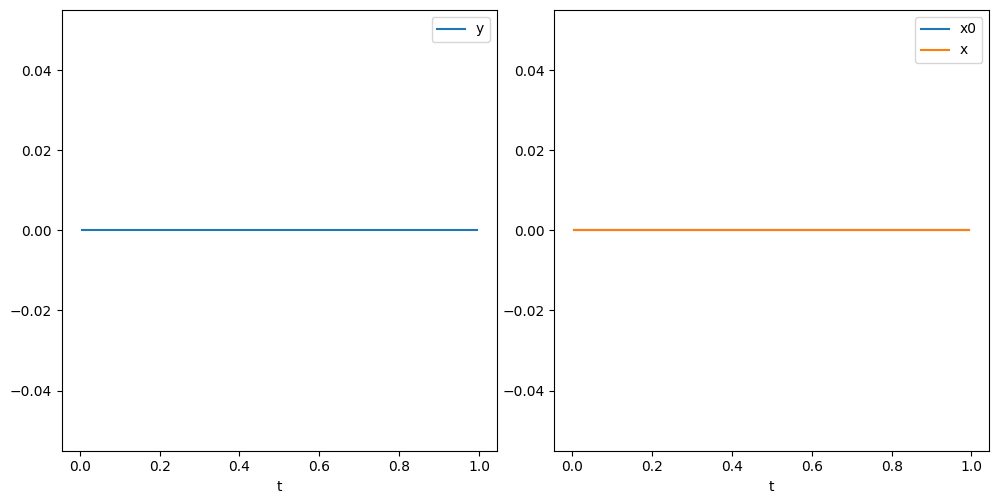

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
fig.tight_layout()

ax[0].plot(t[1:-1], Y, label='y')
ax[0].legend()
ax[0].set_xlabel('t')

ax[1].plot(t[1:-1], X0, label='x0')
ax[1].plot(t[1:-1], Xnext, label='x')

ax[1].legend()
ax[1].set_xlabel('t')

plt.show()

In [9]:
np.allclose(F(Xnext, lmbda), 0)

True

In [11]:
print((np.roll(Xnext, -1) - Xnext) / h)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
